# Feature on Feature - Spearman

In this file we will be looking at how features correlate between each other using the Spearman's correlation coefficient. We will then be recording these results and produce a heatmap to show how correlated features are with one another.

We will also be using spearmans to see how features relate to oil and gas production.

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in data necessary to continue
data_file = "main_file_final.xlsx"
features_file = "features_with_data.xlsx"

data = pd.read_excel(data_file)
data = data.set_index("Field name")

features = pd.read_excel(features_file)
features = features.set_index("Field name")

In [3]:
features

,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],...,Completion logs,# of Wells,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Field name,,,,,,,,,,,,,,,,,,,,,
ALBUSKJELL,0,64,0.00,56,0.99,0.00,24.761,0.00,0.00,0.00,...,0,26,1972,7,1978,6,1986,6,71,96
ALVE,3,1,13.50,3,1.41,0.00,14.149,0.34,2.10,0.28,...,0,8,1990,5,2009,1,2016,7,224,90
ALVHEIM,0,10,11.69,109,0.00,0.00,61.850,9.31,4.20,0.00,...,0,15,1974,10,2006,5,2019,9,379,160
ATLA,0,0,1.88,0,0.00,0.00,1.800,0.00,0.00,0.00,...,0,5,2010,8,2012,6,2012,6,22,0
BALDER,0,14,0.00,263,0.00,0.00,110.120,36.18,1.24,0.00,...,0,7,1970,4,1996,5,2016,4,313,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YTTERGRYTA,1,0,7.39,0,0.41,0.00,3.289,0.00,0.00,0.00,...,0,2,2007,5,2008,10,2008,10,17,0
Ãƒâ€ RFUGL,0,0,63.00,13,4.15,0.00,50.825,4.65,31.61,3.52,...,0,4,2000,5,2010,9,2020,3,124,114
ÃƒËœST FRIGG,0,0,21.37,0,0.00,0.07,9.290,0.00,0.00,0.00,...,0,5,1973,8,1987,7,1988,3,167,8


In [4]:
data

,NPDID field,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable oil \n[mill Sm3],Orig. recoverable gas \n[bill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],...,Gas - Month 574,Gas - Month 575,Gas - Month 576,Gas - Month 577,Gas - Month 578,Gas - Month 579,Gas - Month 580,Gas - Month 581,Gas - Month 582,Gas - Month 583
Field name,,,,,,,,,,,,,,,,,,,,,
ALBUSKJELL,43437,0,64,0.00,56,7.35,15.53,0.99,0.00,24.761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALVE,4444332,3,1,13.50,3,2.39,9.08,1.41,0.00,14.149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALVHEIM,2845712,0,10,11.69,109,51.79,10.06,0.00,0.00,61.850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATLA,21106284,0,0,1.88,0,0.40,1.40,0.00,0.00,1.800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALDER,43562,0,14,0.00,263,106.87,3.25,0.00,0.00,110.120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YTTERGRYTA,4973114,1,0,7.39,0,0.29,2.22,0.41,0.00,3.289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ã†RFUGL,33310197,0,0,63.00,13,5.90,37.04,4.15,0.00,50.825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ã˜ST FRIGG,43576,0,0,21.37,0,0.00,9.22,0.00,0.07,9.290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Loading in oil and gas production values 

oil_prod = data["Orig. recoverable oil \n[mill Sm3]"]
gas_prod = data["Orig. recoverable gas \n[bill Sm3]"]

In [6]:
# Creating the dataframes to hold the necessary information
feature_ranks = pd.DataFrame(columns = features.columns)
feature_pvals = pd.DataFrame(columns = features.columns)

In [7]:
# Zeroing out all the data
for col in feature_ranks.columns:
    feature_pvals.loc[col] = 0
    feature_ranks.loc[col] = 0

In [8]:
feature_ranks

,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],...,Completion logs,# of Wells,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Orig. inplace ass. liquid \n[mill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orig. inplace ass. gas \n[bill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orig. inplace free gas \n[bill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orig. inplace oil \n[mill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orig. recoverable NGL \n[mill tonn],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orig. recoverable cond. \n[mill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orig. recoverable oil eq. \n[mill Sm3 o.e],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Remaining oil \n[mill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Remaining gas \n[bill Sm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Remaining NGL \n[mill tonn],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Here populate the dataframe with the correlation ranks and significance values

for i_col in feature_ranks.columns:
    for j_col in feature_ranks.index:
        i_data = features[i_col]
        j_data = features[j_col]
        
        rho, pval = spearmanr(i_data, j_data, nan_policy = 'omit')
        feature_ranks.at[i_col, j_col] = rho
        feature_pvals.at[i_col, j_col] = pval

In [10]:
feature_ranks

,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],...,Completion logs,# of Wells,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Orig. inplace ass. liquid \n[mill Sm3],1,0.0506754,0.690116,-0.144424,0.498142,0.255877,0.36595,0.041601,0.547147,0.480643,...,0.193078,0.226655,-0.136317,0.178759,-0.00729122,0.266654,0.30306,0.0934081,0.379183,0.27329
Orig. inplace ass. gas \n[bill Sm3],0.0506754,1,-0.219264,0.826354,0.590941,-0.159184,0.550466,0.51923,0.261888,0.437228,...,0.23724,0.357533,-0.329516,0.205911,-0.325556,-0.0983601,0.386951,-0.0104714,0.0514143,0.579962
Orig. inplace free gas \n[bill Sm3],0.690116,-0.219264,1,-0.283952,0.289284,0.384993,0.335982,-0.0461888,0.584773,0.415152,...,0.151373,0.143152,-0.000539194,0.0859757,0.103489,0.249478,0.193683,0.110855,0.345737,0.080399
Orig. inplace oil \n[mill Sm3],-0.144424,0.826354,-0.283952,1,0.421755,-0.274916,0.592607,0.682717,0.158779,0.324033,...,0.173596,0.322878,-0.194537,0.176417,-0.274189,-0.120908,0.43498,-0.0515361,-0.0662177,0.601407
Orig. recoverable NGL \n[mill tonn],0.498142,0.590941,0.289284,0.421755,1,0.100712,0.664033,0.449645,0.604641,0.814964,...,0.264099,0.252849,-0.245841,0.211401,-0.189205,0.113586,0.452154,0.0835631,0.190246,0.538616
Orig. recoverable cond. \n[mill Sm3],0.255877,-0.159184,0.384993,-0.274916,0.100712,1,0.217454,-0.312412,0.120561,0.046373,...,0.0838003,0.0125852,-0.156629,0.0840555,-0.167981,0.128068,-0.0589613,-0.00702847,0.168973,0.0852711
Orig. recoverable oil eq. \n[mill Sm3 o.e],0.36595,0.550466,0.335982,0.592607,0.664033,0.217454,1,0.550116,0.521733,0.522153,...,0.226963,0.395909,-0.32596,0.206194,-0.359159,0.178878,0.519834,-0.00589382,0.208939,0.748662
Remaining oil \n[mill Sm3],0.041601,0.51923,-0.0461888,0.682717,0.449645,-0.312412,0.550116,1,0.465747,0.548317,...,0.206619,0.211449,0.0754951,0.0367634,0.130317,0.0376134,0.535771,-0.053569,0.0803019,0.378225
Remaining gas \n[bill Sm3],0.547147,0.261888,0.584773,0.158779,0.604641,0.120561,0.521733,0.465747,1,0.845115,...,0.216918,0.145549,0.0561752,0.12442,0.238483,0.140871,0.508769,0.107747,0.3277,0.248658
Remaining NGL \n[mill tonn],0.480643,0.437228,0.415152,0.324033,0.814964,0.046373,0.522153,0.548317,0.845115,1,...,0.292945,0.136068,0.00620948,0.13565,0.137369,0.104754,0.486732,0.0301922,0.216623,0.295149


In [11]:
feature_pvals

,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],...,Completion logs,# of Wells,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Orig. inplace ass. liquid \n[mill Sm3],0,0.577775,1.05543e-18,0.110992,4.55286e-09,0.00428265,3.14825e-05,0.647769,5.83036e-11,1.83954e-08,...,0.0323829,0.0117035,0.132732,0.0478994,0.936206,0.00287017,0.000656151,0.30413,1.52494e-05,0.00222502
Orig. inplace ass. gas \n[bill Sm3],0.577775,0,0.0148238,5.84116e-32,6.23541e-13,0.0786382,4.229e-11,7.59701e-10,0.00343269,4.27096e-07,...,0.00823967,4.91203e-05,0.000197895,0.022319,0.000238464,0.279095,9.81695e-06,0.908484,0.572235,2.07312e-12
Orig. inplace free gas \n[bill Sm3],1.05543e-18,0.0148238,0,0.00145855,0.00117353,1.09811e-05,0.000145148,0.611945,1.23133e-12,1.8012e-06,...,0.0946591,0.114206,0.995277,0.344387,0.254664,0.00539032,0.0318345,0.222219,8.97521e-05,0.376698
Orig. inplace oil \n[mill Sm3],0.110992,5.84116e-32,0.00145855,0,1.18365e-06,0.00208848,5.17606e-13,3.40932e-18,0.0794115,0.00025602,...,0.0548307,0.00027012,0.0310728,0.0509474,0.0021485,0.182814,4.96809e-07,0.571323,0.466803,1.90038e-13
Orig. recoverable NGL \n[mill tonn],4.55286e-09,6.23541e-13,0.00117353,1.18365e-06,0,0.267705,5.68004e-17,1.81567e-07,1.30493e-13,1.89335e-30,...,0.0031604,0.00477843,0.00612784,0.0189147,0.036088,0.210962,1.52115e-07,0.358145,0.0350588,1.31004e-10
Orig. recoverable cond. \n[mill Sm3],0.00428265,0.0786382,1.09811e-05,0.00208848,0.267705,0,0.0156903,0.000434947,0.184085,0.610525,...,0.356778,0.890117,0.0836191,0.35531,0.0632824,0.158051,0.517114,0.938501,0.061717,0.34837
Orig. recoverable oil eq. \n[mill Sm3 o.e],3.14825e-05,4.229e-11,0.000145148,5.17606e-13,5.68004e-17,0.0156903,0,4.37562e-11,6.09167e-10,5.86922e-10,...,0.0115871,5.82526e-06,0.000233993,0.0221317,4.51193e-05,0.0477491,7.2037e-10,0.948414,0.0203815,2.40985e-23
Remaining oil \n[mill Sm3],0.647769,7.59701e-10,0.611945,3.40932e-18,1.81567e-07,0.000434947,4.37562e-11,0,5.68634e-08,5.20846e-11,...,0.0218529,0.0188869,0.406585,0.686434,0.150815,0.679578,1.70748e-10,0.55622,0.377277,1.60886e-05
Remaining gas \n[bill Sm3],5.83036e-11,0.00343269,1.23133e-12,0.0794115,1.30493e-13,0.184085,6.09167e-10,5.68634e-08,0,1.05015e-34,...,0.015955,0.108207,0.537143,0.170336,0.0078993,0.120151,1.87504e-09,0.235533,0.000215623,0.00554919
Remaining NGL \n[mill tonn],1.83954e-08,4.27096e-07,1.8012e-06,0.00025602,1.89335e-30,0.610525,5.86922e-10,5.20846e-11,1.05015e-34,0,...,0.00100831,0.133446,0.945655,0.134654,0.12974,0.248872,1.14168e-08,0.740264,0.0161024,0.000919431


In [12]:
# Export the tables

feature_ranks.to_csv("feature_ranks_df.csv")
feature_pvals.to_csv("feature_pvals.csv")

In [13]:
# Here this table is to help visualize the table that was created in
# the previous cells

# First create the blank dataframe
sorted_ranks = pd.DataFrame(columns = ["feature 1", "feature 2", "rank", "abs rank"])
for i in range(529):
    sorted_ranks.loc[i] = 0

In [14]:
# Then insert the the appropriate rank and absolute value of the rank
index = 0
for i in feature_ranks.index:
    for j in feature_ranks.columns:
        sorted_ranks.at[index, "feature 1"] = i
        sorted_ranks.at[index, "feature 2"] = j
        sorted_ranks.at[index, "rank"] = feature_ranks.at[i, j]
        sorted_ranks.at[index, "abs rank"] = abs(feature_ranks.at[i,j])
        index += 1

In [15]:
# Here we were interested in seeing the features that were the
# ranked the highest
sorted_ranks = sorted_ranks.sort_values(by=['abs rank'], ascending = False)
sorted_ranks = sorted_ranks.reset_index().drop(["index"], axis = 1)

In [16]:
# Next we wanted to make sure that we didn't have any repeats combinations 
# of the features. So for example, feature 1 vs feature 2 is the same as
# feature 2 vs feature 1
for i in range(23):
    sorted_ranks = sorted_ranks.drop([i])
sorted_ranks = sorted_ranks.reset_index().drop(["index"], axis = 1)

for i in range(1, len(sorted_ranks), 2):
    sorted_ranks = sorted_ranks.drop([i])
sorted_ranks = sorted_ranks.reset_index().drop(["index"], axis = 1)

sorted_ranks

,feature 1,feature 2,rank,abs rank
0,Completion logs,Avg Core Photos,0.99878,0.99878
1,Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],0.845115,0.845115
2,Remaining oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],0.829428,0.829428
3,Orig. inplace ass. gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],0.826354,0.826354
4,Orig. recoverable NGL \n[mill tonn],Remaining NGL \n[mill tonn],0.814964,0.814964
...,...,...,...,...
248,Orig. inplace ass. liquid \n[mill Sm3],Dev start year,-0.00729122,0.00729122
249,Dev end month,Orig. recoverable cond. \n[mill Sm3],-0.00702847,0.00702847
250,Remaining NGL \n[mill tonn],Exp start year,0.00620948,0.00620948
251,Orig. recoverable oil eq. \n[mill Sm3 o.e],Dev end month,-0.00589382,0.00589382


In [17]:
sorted_ranks.to_csv("features_v_features.csv")

In [18]:
# Now we want to see how the features correlate to oil and to gas individually
# using spearman's rank
col = ["feature", "oil - rank", "oil - abs rank", "gas - rank", "gas - abs rank"]
rank_production = pd.DataFrame(columns = col)

for i in range(23):
    rank_production.loc[i] = 0
    
rank_production

,feature,oil - rank,oil - abs rank,gas - rank,gas - abs rank
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


In [19]:
# So here we will loop through all the features and calculate the appropriate
# Spearman's correlation for their correlation with oil
# and with gas production.
count = 0
for feature in features.columns:
    feature_data = features[feature]
    
    rank_production.at[count, "feature"] = feature
    
    oil_rho, oil_pval = spearmanr(feature_data, oil_prod, nan_policy = 'omit')
    rank_production.at[count, "oil - rank"] = oil_rho
    rank_production.at[count, "oil - abs rank"] = abs(oil_rho)
    
    gas_rho, gas_pval = spearmanr(feature_data, gas_prod, nan_policy = 'omit')
    rank_production.at[count, "gas - rank"] = gas_rho
    rank_production.at[count, "gas - abs rank"] = abs(gas_rho)
    count += 1

In [20]:
rank_production

,feature,oil - rank,oil - abs rank,gas - rank,gas - abs rank
0,Orig. inplace ass. liquid \n[mill Sm3],0.00681981,0.00681981,0.576056,0.576056
1,Orig. inplace ass. gas \n[bill Sm3],0.751846,0.751846,0.303061,0.303061
2,Orig. inplace free gas \n[bill Sm3],-0.168426,0.168426,0.662189,0.662189
3,Orig. inplace oil \n[mill Sm3],0.911191,0.911191,0.127592,0.127592
4,Orig. recoverable NGL \n[mill tonn],0.516482,0.516482,0.677955,0.677955
5,Orig. recoverable cond. \n[mill Sm3],-0.290852,0.290852,0.378413,0.378413
6,Orig. recoverable oil eq. \n[mill Sm3 o.e],0.699077,0.699077,0.730044,0.730044
7,Remaining oil \n[mill Sm3],0.764921,0.764921,0.159976,0.159976
8,Remaining gas \n[bill Sm3],0.27332,0.27332,0.685209,0.685209
9,Remaining NGL \n[mill tonn],0.413873,0.413873,0.58158,0.58158


In [21]:
temp = pd.read_excel("feature_ranks_df.xlsx")
temp.columns

Index(['Unnamed: 0', 'Orig. inplace ass. liquid \n[mill Sm3]',
       'Orig. inplace ass. gas \n[bill Sm3]',
       'Orig. inplace free gas \n[bill Sm3]', 'Orig. inplace oil \n[mill Sm3]',
       'Orig. recoverable NGL \n[mill tonn]',
       'Orig. recoverable cond. \n[mill Sm3]',
       'Orig. recoverable oil eq. \n[mill Sm3 o.e]',
       'Remaining oil \n[mill Sm3]', 'Remaining gas \n[bill Sm3]',
       'Remaining NGL \n[mill tonn]', 'Remaining cond.  \n[mill Sm3]',
       'Remaining  oil eq. \n[mill Sm3 o.e]', 'Avg Core Photos',
       'Completion logs', '# of Wells', 'Exp start year', 'Exp start month',
       'Dev start year', 'Dev start month', 'Dev end year', 'Dev end month',
       'Exp Duration', 'Dev Duration'],
      dtype='object')

In [22]:
temp = temp.set_index(["Unnamed: 0"])

In [23]:
temp

,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],...,Completion logs,# of Wells,Exp start year,Exp start month,Dev start year,Dev start month,Dev end year,Dev end month,Exp Duration,Dev Duration
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Orig. inplace ass. liquid \n[mill Sm3],1.000000,0.050675,0.690116,-0.144424,0.498142,0.255877,0.365950,0.041601,0.547147,0.480643,...,0.193078,0.226655,-0.164900,0.161016,-0.031795,0.251273,0.224873,-0.031799,0.362342,0.198166
Orig. inplace ass. gas \n[bill Sm3],0.050675,1.000000,-0.219264,0.826354,0.590941,-0.159184,0.550466,0.519230,0.261888,0.437228,...,0.237240,0.357533,-0.349189,0.202557,-0.356240,-0.120499,0.366670,-0.120837,0.025177,0.601072
Orig. inplace free gas \n[bill Sm3],0.690116,-0.219264,1.000000,-0.283952,0.289284,0.384993,0.335982,-0.046189,0.584773,0.415152,...,0.151373,0.143152,-0.032048,0.059615,0.086452,0.241440,0.121292,0.011144,0.331430,-0.000469
Orig. inplace oil \n[mill Sm3],-0.144424,0.826354,-0.283952,1.000000,0.421755,-0.274916,0.592607,0.682717,0.158779,0.324033,...,0.173596,0.322878,-0.204973,0.175221,-0.302040,-0.143021,0.460911,-0.136495,-0.094952,0.660107
Orig. recoverable NGL \n[mill tonn],0.498142,0.590941,0.289284,0.421755,1.000000,0.100712,0.664033,0.449645,0.604641,0.814964,...,0.264099,0.252849,-0.265717,0.206317,-0.215906,0.096842,0.434387,-0.020702,0.169887,0.537297
Orig. recoverable cond. \n[mill Sm3],0.255877,-0.159184,0.384993,-0.274916,0.100712,1.000000,0.217454,-0.312412,0.120561,0.046373,...,0.083800,0.012585,-0.174143,0.072817,-0.185783,0.118182,-0.159655,-0.101908,0.155588,0.010729
Orig. recoverable oil eq. \n[mill Sm3 o.e],0.365950,0.550466,0.335982,0.592607,0.664033,0.217454,1.000000,0.550116,0.521733,0.522153,...,0.226963,0.395909,-0.365608,0.185521,-0.401371,0.156727,0.473262,-0.201722,0.166510,0.751164
Remaining oil \n[mill Sm3],0.041601,0.519230,-0.046189,0.682717,0.449645,-0.312412,0.550116,1.000000,0.465747,0.548317,...,0.206619,0.211449,0.048151,0.009052,0.096778,0.001767,0.666355,-0.065978,0.035498,0.463579
Remaining gas \n[bill Sm3],0.547147,0.261888,0.584773,0.158779,0.604641,0.120561,0.521733,0.465747,1.000000,0.845115,...,0.216918,0.145549,0.025092,0.096257,0.213681,0.114530,0.536141,0.047805,0.295933,0.217600


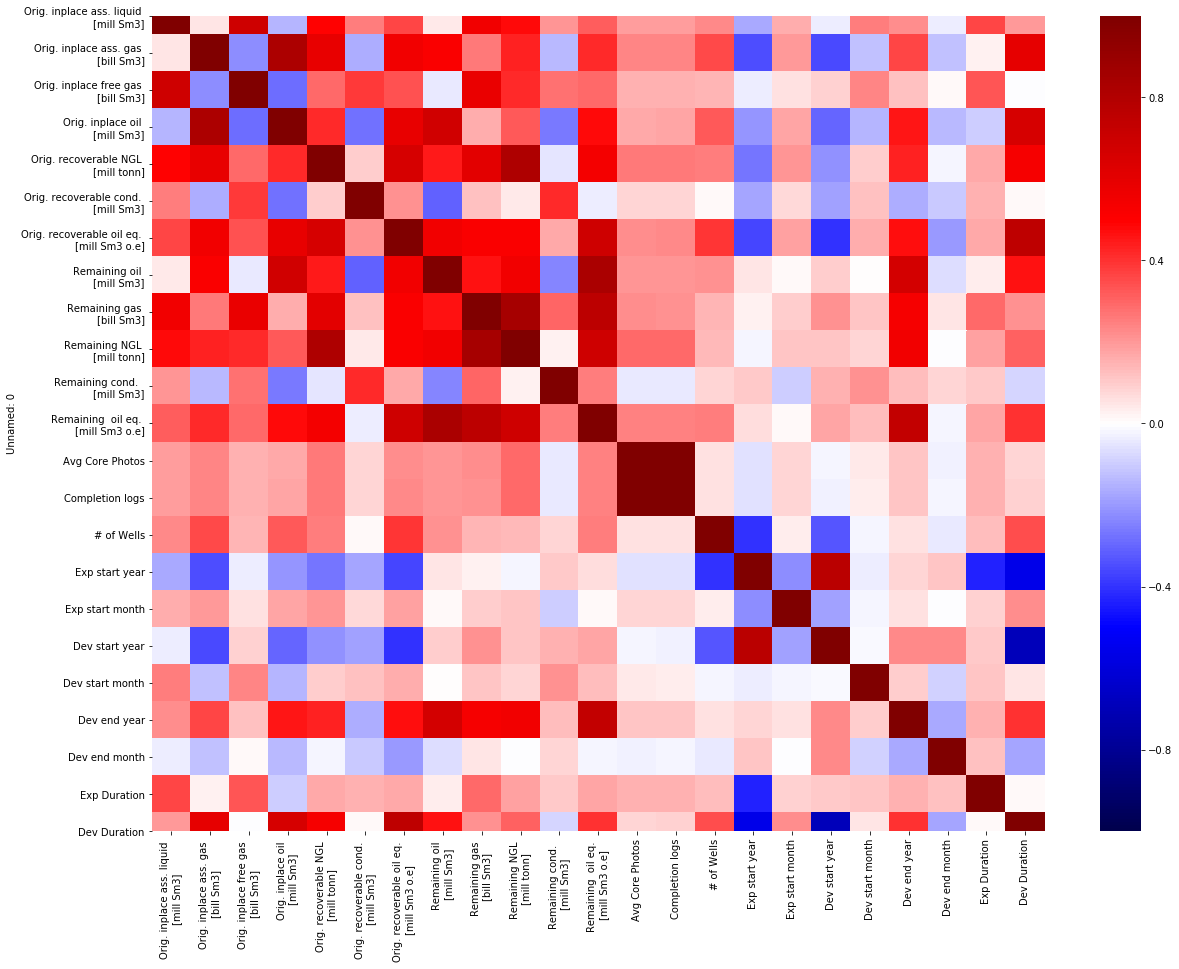

In [24]:
# Here we are plotting the heat map of the spearman's rank correlation between features
plt.subplots(figsize = (20,15))
sns.heatmap(temp, vmin = -1, vmax = 1, cmap = 'seismic')

In [25]:
temp = pd.read_excel("feature_pvals.xlsx")
temp = temp.set_index(["Unnamed: 0"])

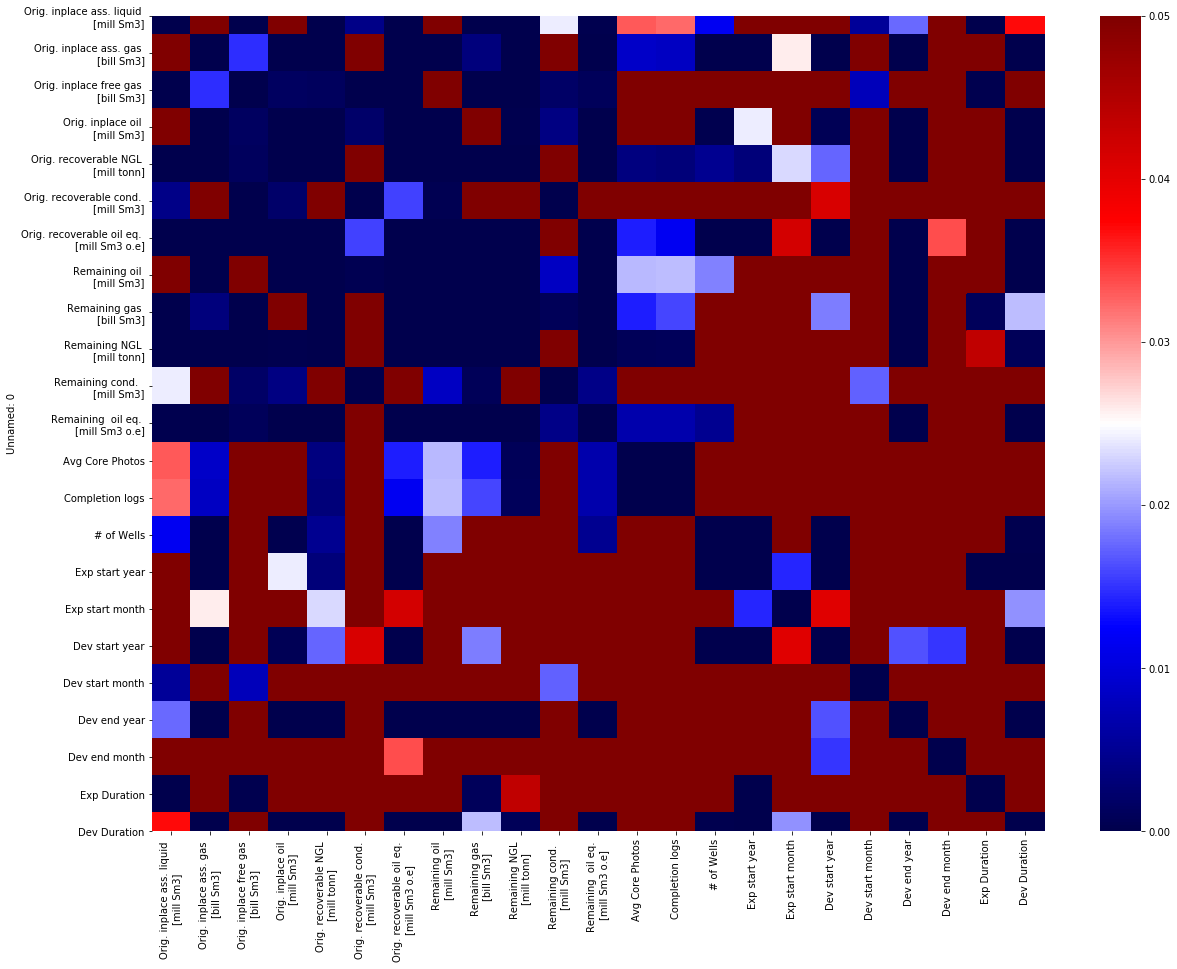

In [26]:
# Here we are plotting the heat map of the statistical significance between
# all the features.
plt.subplots(figsize = (20,15))
sns.heatmap(temp, vmin = 0, vmax = 0.05, cmap = 'seismic')